In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# splitting the data

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# Importing the models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings

# Filter out a specific warning by category
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
# Importing dataset

df = pd.read_csv("output.csv")
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


In [6]:
df.shape

(4600, 18)

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [9]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
df.nunique()
df.duplicated().sum()

0

In [11]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.103478,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.159990,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [12]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [13]:
del df["street"]
del df["city"]
del df["country"]
del df["date"]  

In [14]:
lis = []
for i in df["statezip"]:
    lis.append(i[2:])
    
arr = np.array(lis,dtype=np.int64)
df["statezip"] = arr
df.drop(np.where(df["price"]==0)[0],axis=0,inplace=True)

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.126126,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,98079.397056
std,5.639299e+05,0.904595,0.776351,955.900120,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,53.048784
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000


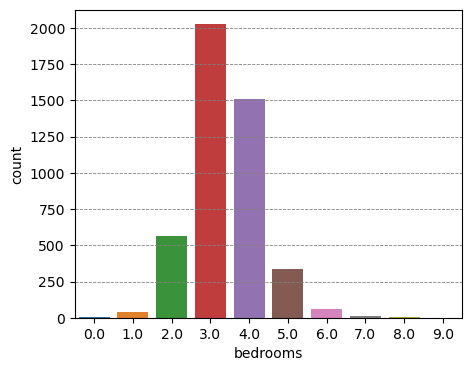

In [16]:
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

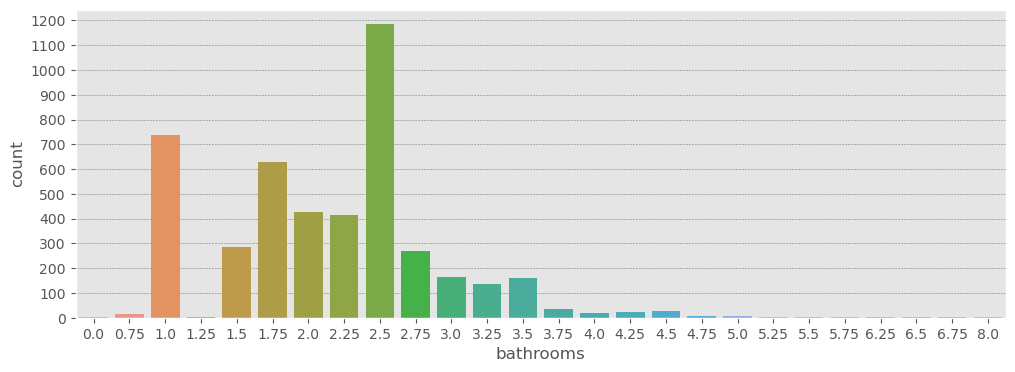

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

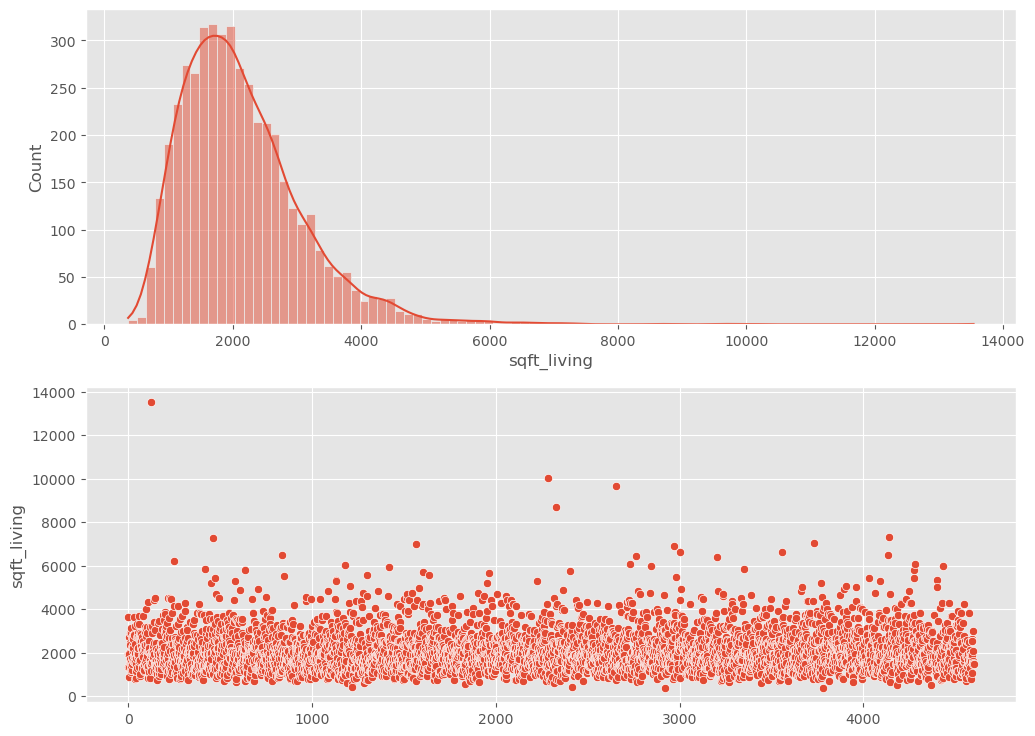

In [18]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_living",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_living")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()


In [19]:
print("Before transformation skew : ",df["sqft_living"].skew())
df["sqft_living"] = np.log(df["sqft_living"])
print("After transformation skew : ",df["sqft_living"].skew())

Before transformation skew :  1.7201667589352616
After transformation skew :  -0.0501533394513975


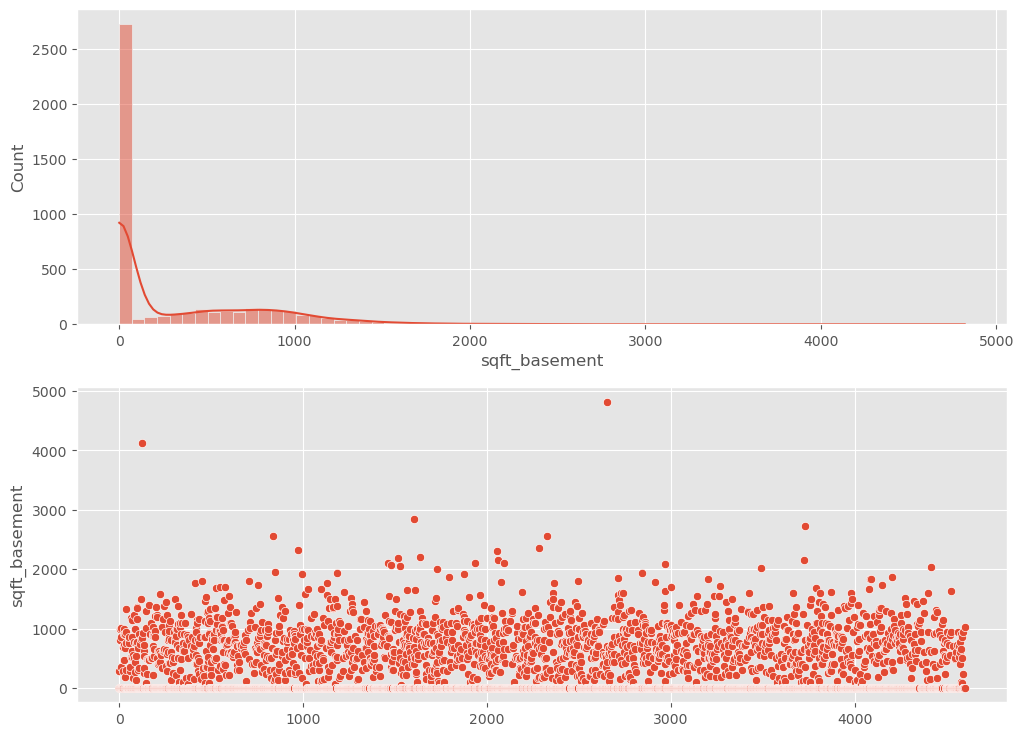

In [20]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_basement",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_basement")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [21]:
print("Before transformation skew : ",df["sqft_lot"].skew())
df["sqft_lot"] = np.log(df["sqft_lot"])
print("After transformation skew : ",df["sqft_lot"].skew())

Before transformation skew :  11.329014386009023
After transformation skew :  0.8412624258021195


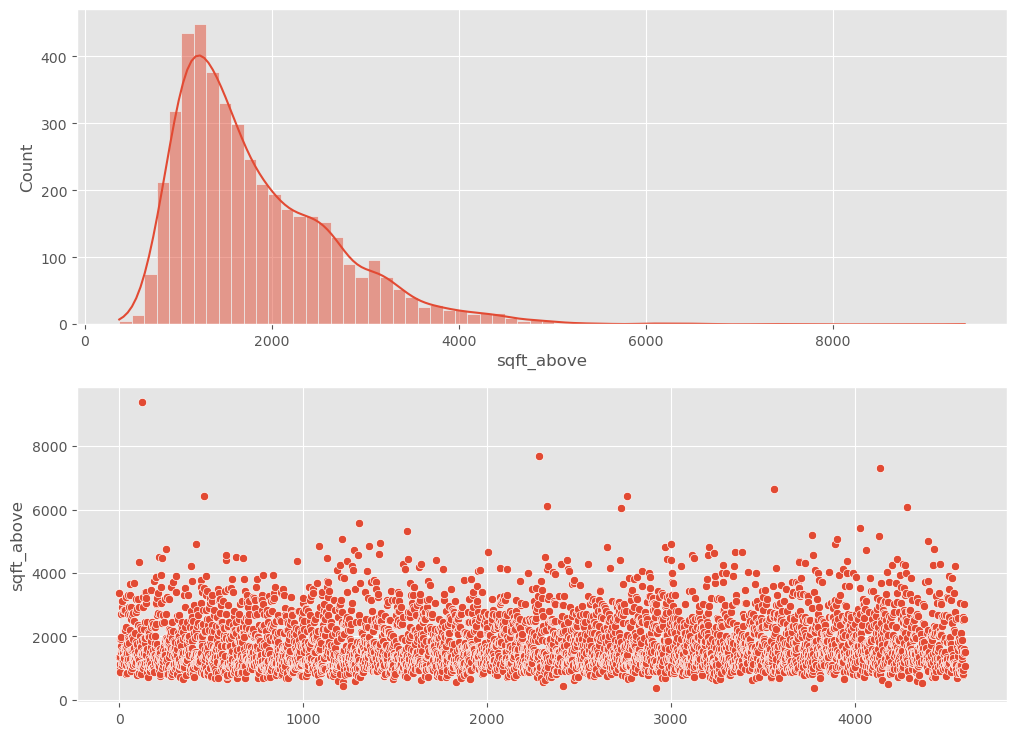

In [22]:
fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_above",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_above")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [23]:
print("Before transformation skew : ",df["sqft_above"].skew())
df["sqft_above"] = np.log(df["sqft_above"])
print("After transformation skew : ",df["sqft_above"].skew())



Before transformation skew :  1.4539329178421054
After transformation skew :  0.23924533231027634


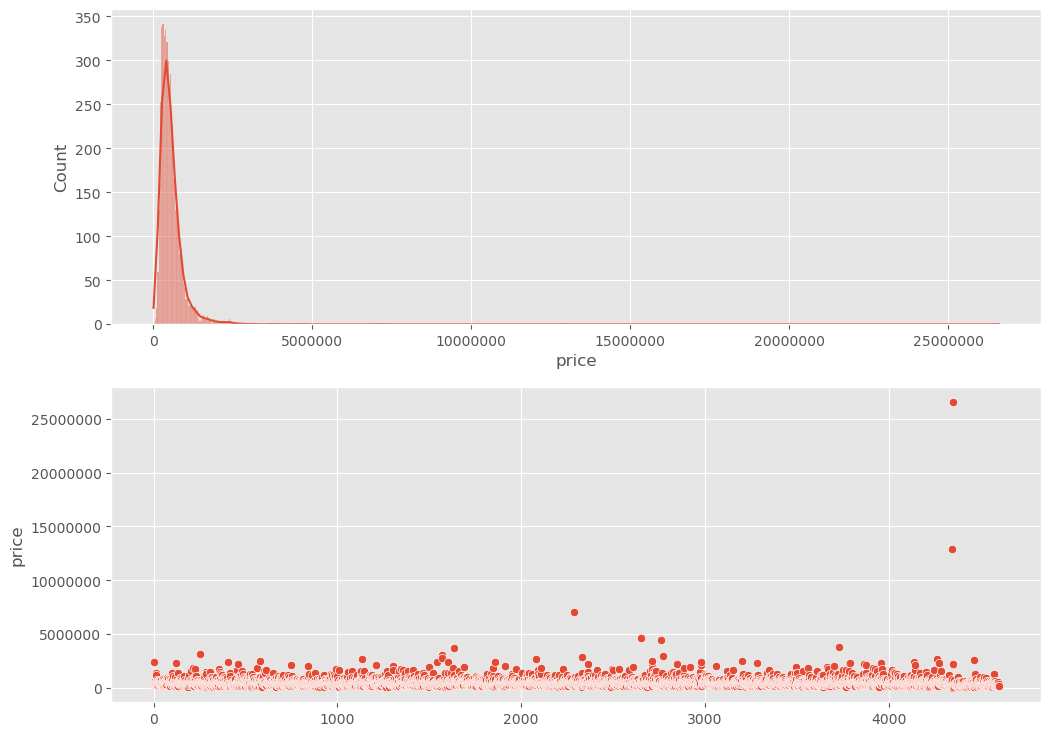

In [24]:

fig,axs = plt.subplots(2,1,figsize=(12,9))
plt.subplot(2,1,1)
sns.histplot(data=df,x="price",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="price")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [25]:
print("Before transformation skew : ",df["price"].skew())
df["price"] = np.log(df["price"])
print("After transformation skew : ",df["price"].skew())

Before transformation skew :  25.023817262008482
After transformation skew :  0.3299813838090415


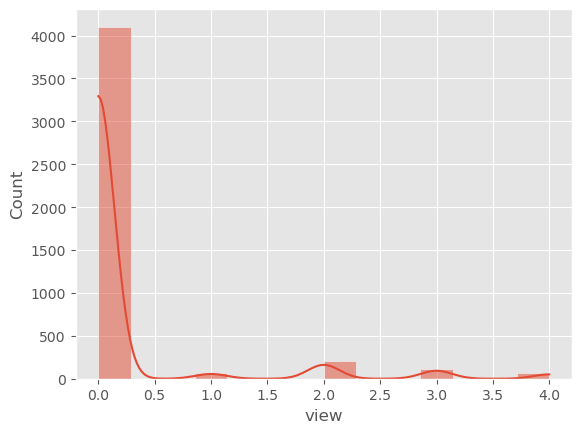

In [26]:
sns.histplot(data=df,x="view",kde=True)
plt.style.use("ggplot")

In [27]:
print("Before transformation skew : ",df["view"].skew())
df["view"] = np.cbrt(df["view"])
print("After transformation skew : ",df["view"].skew())

Before transformation skew :  3.3733978634952058
After transformation skew :  2.792533459550797


Median value of house with respect to number of bedrooms : 
 bedrooms
0.0    13.990393
1.0    12.524526
2.0    12.821258
3.0    12.959844
4.0    13.262125
5.0    13.303017
6.0    13.415033
7.0    13.462471
8.0    13.615122
9.0    13.304683
Name: price, dtype: float64


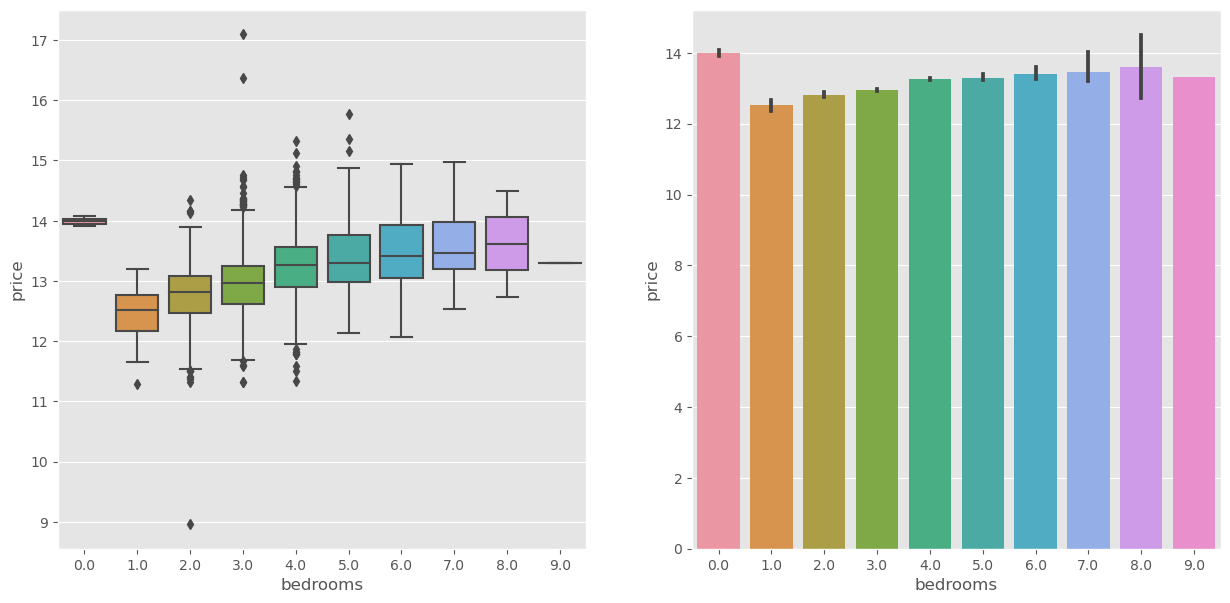

In [28]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of bedrooms : \n",df.groupby("bedrooms")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="bedrooms", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of floors : 
 floors
1.0    12.886641
1.5    13.191889
2.0    13.230321
2.5    13.630987
3.0    13.081541
3.5    13.574094
Name: price, dtype: float64


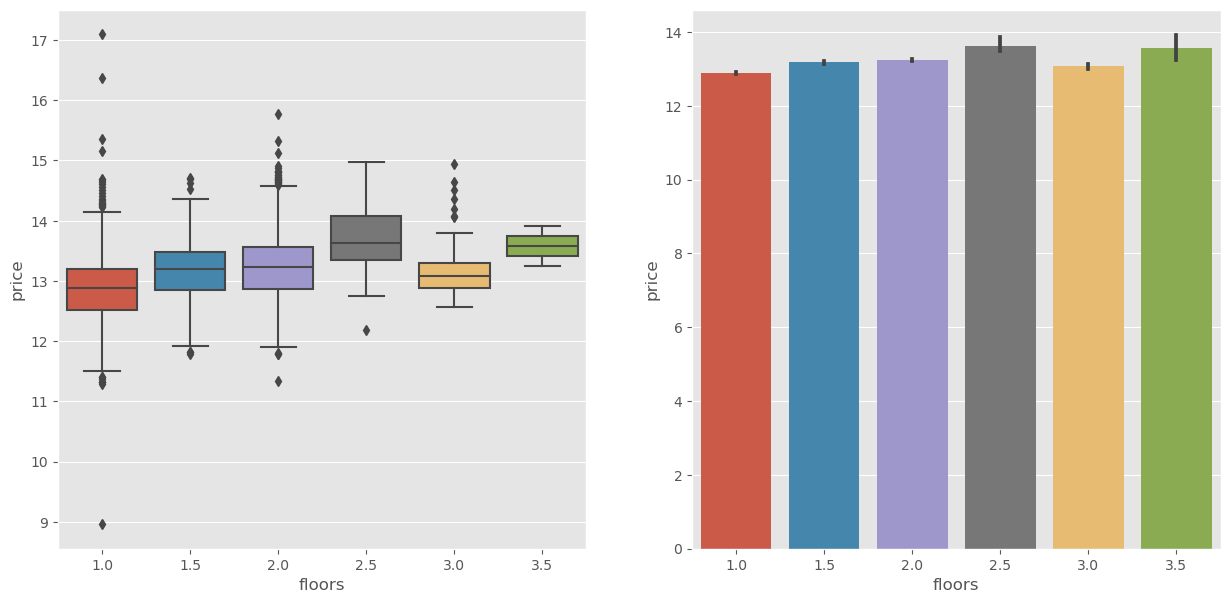

In [29]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="floors")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of floors : \n",df.groupby("floors")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="floors",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of waterfront : 
 waterfront
0    13.047640
1    13.882885
Name: price, dtype: float64


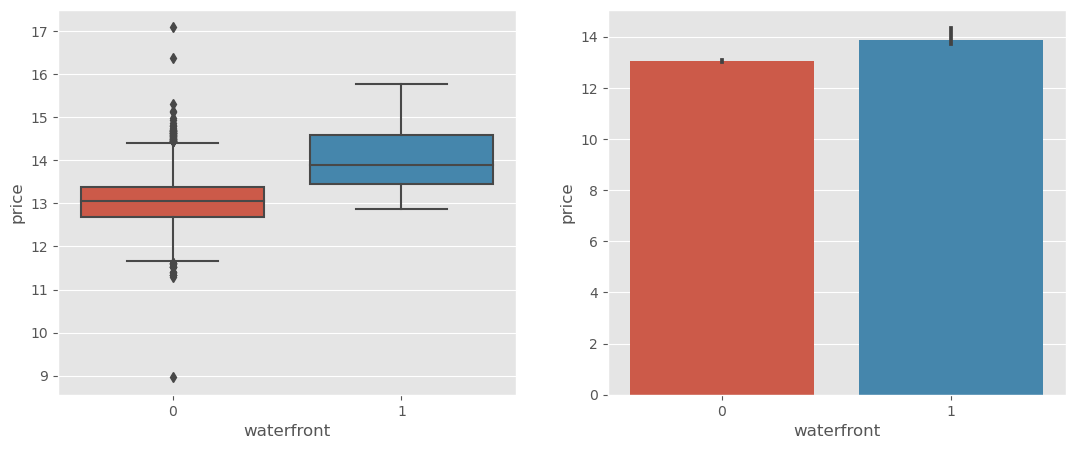

In [30]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="waterfront")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of waterfront : \n",df.groupby("waterfront")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="waterfront",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of view : 
 view
0.000000    13.005830
1.000000    13.485617
1.259921    13.407467
1.442250    13.710150
1.587401    13.954403
Name: price, dtype: float64


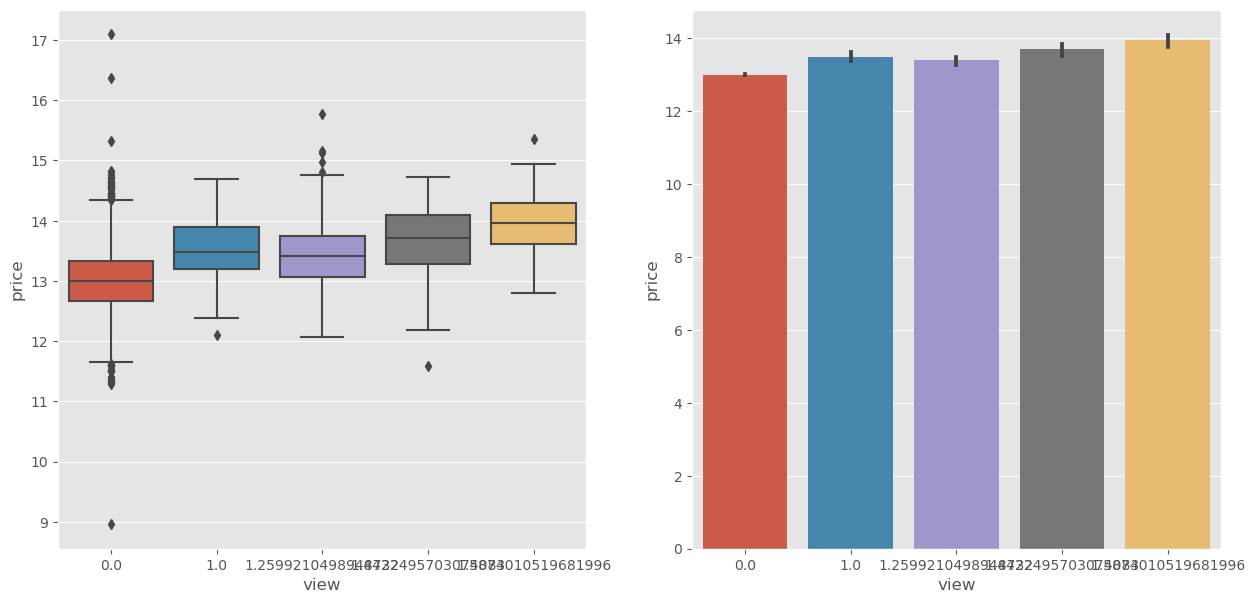

In [31]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="view")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of view : \n",df.groupby("view")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="view", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

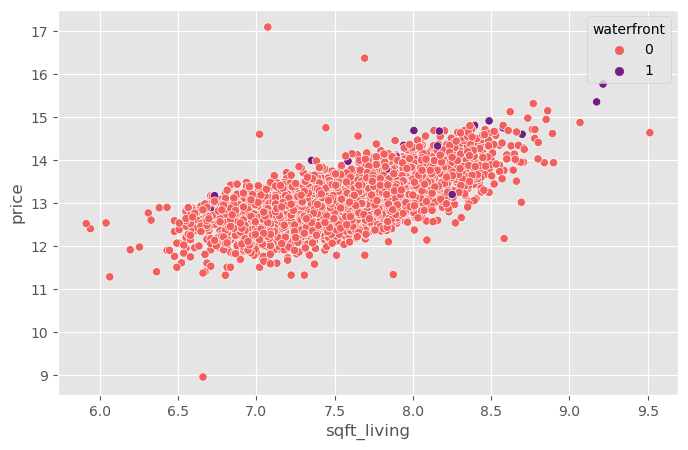

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="waterfront",palette= 'magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

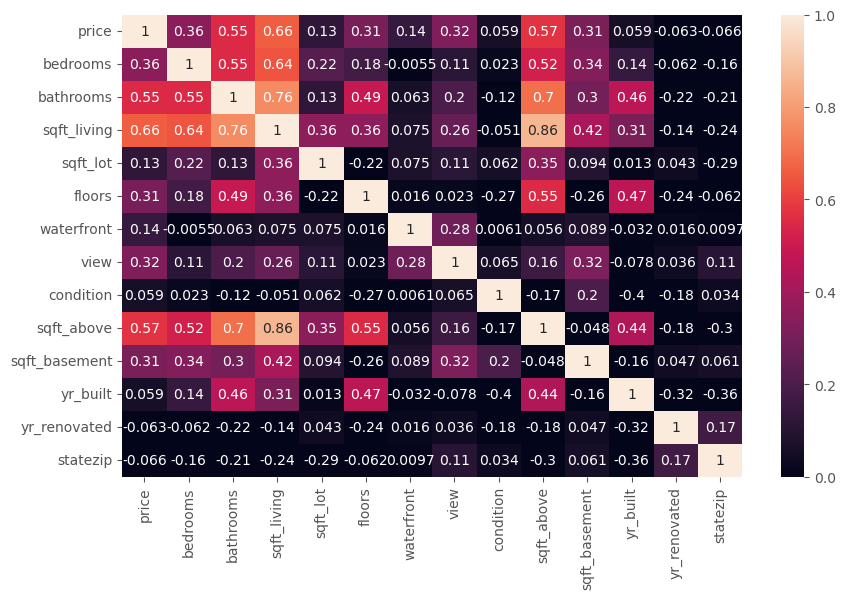

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=0)
plt.show()



In [34]:
del df["sqft_above"]


In [35]:
X = df.drop("price",axis=1,inplace=False)
Y = df.loc[:,"price"]

print("Shape of x : ",X.shape)
print("Shape of y : ",Y.shape)

Shape of x :  (4551, 12)
Shape of y :  (4551,)


In [36]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'statezip'],
      dtype='object')

In [37]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [38]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xscaled,Y,test_size=0.2,random_state=42)

In [39]:
gradient = GradientBoostingRegressor(random_state=42)
gradient.fit(Xtrain,Ytrain)

GradientBoostingRegressor(random_state=42)

In [40]:
import numpy as np

print("Infinite values in Ytrain:", np.any(np.isinf(Ytrain)))
print("Large values in Ytrain:", np.any(np.abs(Ytrain) > 1e15))


Infinite values in Ytrain: False
Large values in Ytrain: False


In [41]:
print("Missing values in Ytrain:", np.any(np.isnan(Ytrain)))


Missing values in Ytrain: False


In [42]:
Ytrain = Ytrain.astype(np.float64)


In [43]:
# Replace infinite values with a large number
Ytrain[np.isinf(Ytrain)] = np.finfo(Ytrain.dtype).max

# Replace very large values with the maximum allowable value
max_allowable_value = 1e15
Ytrain[np.abs(Ytrain) > max_allowable_value] = max_allowable_value


In [44]:
# Remove samples with infinite or very large values
mask = ~np.isinf(Ytrain) & (np.abs(Ytrain) <= max_allowable_value)
Xtrain = Xtrain[mask]
Ytrain = Ytrain[mask]


In [45]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
Ytrain = imputer.fit_transform(Ytrain.values.reshape(-1, 1)).flatten()



In [46]:
Ypred = gradient.predict(Xtest)

In [47]:
print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("train r2score : ",r2_score(Ytrain,gradient.predict(Xtrain)))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.09598293859661913
rmse :  0.3098111337518701
mae :  0.2189274110148186
train r2score :  0.7735624900358753
test r2score :  0.6723294902936265


In [48]:
parameter = {
                "learning_rate":[0.05,0.08,0.1,0.04],
                "n_estimators":[100,200,300,400],
                "min_samples_split":[4,6,8,9,11],
                "min_samples_leaf":[3,5,7,9],
                "max_depth":[5,7,9,11]
}

In [49]:
gradient = GradientBoostingRegressor()
random = RandomizedSearchCV(gradient,parameter,cv=5,random_state=42)
random.fit(Xtrain,Ytrain)
best_parameters = random.best_params_
best_score = random.best_score_
print(best_parameters)
print(best_score)

{'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_depth': 5, 'learning_rate': 0.08}
0.754838489932293


In [50]:
Ypred = random.predict(Xtest)
print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.07300677111310715
rmse :  0.27019765193855244
mae :  0.17510847150579992
test r2score :  0.7507664773300555
